In [1]:
import pandas as pd
bikes = pd.read_pickle(' BikeData.pkl')
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,0,True,644,0,Chilly,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,0,True,359,0,Chilly,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,0,True,1236,0,Chilly,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,0,True,628,1,Chilly,0


In [2]:
bikes['Humidity'].sum() / len(bikes['Humidity'])

58.226255707762554

In [3]:
bikes['Humidity'].mean()

58.226255707762554

In [4]:
hum_sorted = bikes['Humidity'].sort_values().reset_index(drop=True)
len(bikes['Humidity'])
ind_1, ind_2 = int(len(hum_sorted)/2), int(len(hum_sorted)/2 + 1)
ind_1, ind_2
(hum_sorted[ind_1] + hum_sorted[ind_2])/2

57.0

In [5]:
bikes['Humidity'].median()

57.0

In [6]:
bikes['Humidity'].value_counts().head(2)

53    173
97    173
Name: Humidity, dtype: int64

In [7]:
bikes['Humidity'].mode()

0    53
1    97
dtype: int64

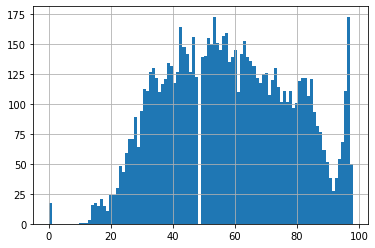

In [8]:
bikes['Humidity'].hist(bins=100)

In [9]:
bikes[['Temperature', 'Humidity']].describe()

,Temperature,Humidity
count,8581.000000,8760.000000
mean,12.878557,58.226256
std,11.955551,20.362413
min,-17.800000,0.000000
25%,3.400000,42.000000
50%,13.700000,57.000000
75%,22.500000,74.000000
max,39.400000,98.000000


In [10]:
bikes['Humidity'].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity, dtype: float64

In [11]:
bikes.groupby('Hour')['Rental Count'].mean()

Hour
0      558.178082
1      415.720548
2      319.767123
3      201.010959
4      122.838356
5      135.863014
6      283.654795
7      612.646575
8      979.838356
9      642.136986
10     519.123288
11     585.336986
12     710.534247
13     700.706849
14     747.147945
15     796.084932
16     938.032877
17    1128.873973
18    1518.983562
19    1168.328767
20    1069.698630
21     997.942466
22     893.621918
23     671.898630
Name: Rental Count, dtype: float64

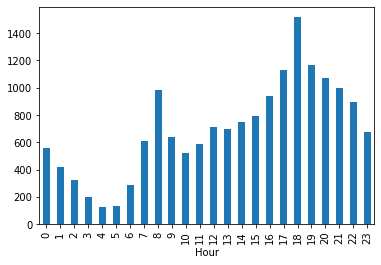

In [12]:
bikes.groupby('Hour')['Rental Count'].mean().plot(kind='bar')

In [13]:
bikes.groupby(['Hour', 'Good Weather'])['Rental Count'].median()

Hour  Good Weather
0     0                386.0
      1               1053.0
1     0                301.0
      1                621.5
2     0                230.0
      1                550.0
3     0                155.0
      1                347.0
4     0                 91.0
      1                193.5
5     0                105.0
      1                353.5
6     0                188.0
      1                349.0
7     0                386.5
      1                671.0
8     0                755.0
      1                914.5
9     0                477.0
      1                995.0
10    0                346.0
      1                724.0
11    0                422.0
      1               1005.5
12    0                506.0
      1               1048.0
13    0                505.0
      1                933.5
14    0                534.0
      1                874.0
15    0                668.5
      1                758.0
16    0                771.0
      1               10

In [14]:
bikes.groupby('Seasons')['Temperature Category'].agg(lambda x: x.value_counts()[0])

Seasons
Autumn    1138
Spring    1224
Summer    1166
Winter    1370
Name: Temperature Category, dtype: int64

In [15]:
bikes.groupby('Seasons')['Temperature'].mean()

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [16]:
bikes.groupby('Seasons')['Temperature'].agg(['mean', 'median'])

,mean,median
Seasons,,
Autumn,14.138821,13.8
Spring,13.038533,13.3
Summer,26.574827,26.6
Winter,-2.567783,-2.2


In [17]:
bikes.pivot_table(index='Hour', values=['Temperature', 'Rental Count'], aggfunc=['mean', 'median'])

mean                   median            
     Rental Count Temperature Rental Count Temperature
Hour                                                  
0      558.178082   11.253652          433       11.80
1      415.720548   10.972145          329       11.50
2      319.767123   10.542535          239       10.90
3      201.010959   10.355462          165       10.70
4      122.838356   10.069859           94       10.40
5      135.863014    9.849580          107       10.00
6      283.654795    9.763944          193       10.00
7      612.646575    9.454062          410        9.60
8      979.838356    9.988515          762       10.40
9      642.136986   11.459669          519       12.10
10     519.123288   12.766947          414       14.00
11     585.336986   14.285434          485       16.40
12     710.534247   15.417175          572       17.40
13     700.706849   16.184765          586       18.30
14     747.147945   16.862360          567       19.10
15     796.084932   17.084358          678       19.20
16     938.032877   16.821652          804       18.80
17    1128.873973   16.325281          899       18.40
18    1518.983562   15.255956         1154       16.80
19    1168.328767   14.254062          845       15.20
20    1069.698630   13.394460          721       14.10
21     997.942466   12.680165          688       13.40
22     893.621918   12.281461          649       12.95
23     671.898630   11.717416          516       12.25

In [18]:
import numpy as np

In [21]:
bikes_hour = pd.DataFrame(bikes.groupby('Hour')['Rental Count'].sum())

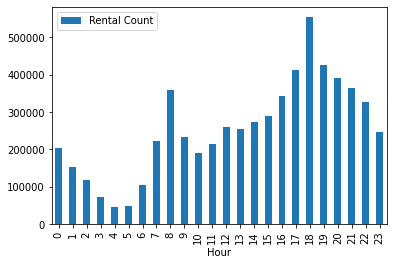

In [22]:
bikes_hour.plot(kind='bar')

In [24]:
bikes_hour['Rental Count'].max() - bikes_hour['Rental Count'].min()

509593

In [25]:
bikes_hour.describe()['Rental Count']['25%']

,Rental Count
count,24.000000
mean,254252.458333
std,128710.527497
min,44836.000000
25%,180044.500000
50%,250500.500000
75%,346196.750000
max,554429.000000


In [26]:
np.percentile(bikes_hour['Rental Count'], 25)

180044.5

In [27]:
np.percentile(bikes_hour['Rental Count'], 75) - np.percentile(bikes_hour['Rental Count'], 25)

166152.25

*Для выборки:*

In [32]:
bikes_mean = bikes_hour['Rental Count'].mean()
bikes_deviations = bikes_hour['Rental Count'] -bikes_mean
sq_deviations = bikes_deviations ** 2
variance = sq_deviations.sum() / (len(sq_deviations) - 1)
variance

16566399888.43297

In [35]:
std = np.sqrt(variance)
std

128710.52749652209

*Для генеральной совокупности:*

In [37]:
variance = sq_deviations.sum() / (len(sq_deviations))
std = np.sqrt(variance)
print(variance, std)

15876133226.41493 126000.52867514061


In [38]:
print(bikes_hour['Rental Count'].var())
print(bikes_hour['Rental Count'].std())

16566399888.43297
128710.52749652209


In [39]:
print(bikes_hour['Rental Count'].var(ddof=0))
print(bikes_hour['Rental Count'].std(ddof=0))

15876133226.41493
126000.52867514061


In [40]:
bikes.groupby('Hour')['Rental Count'].std()

Hour
0      455.016192
1      338.058896
2      268.797389
3      162.601701
4      106.375778
5      113.191916
6      273.636723
7      582.515881
8      871.005983
9      500.018849
10     415.278139
11     452.773454
12     538.838247
13     539.252891
14     613.267340
15     631.989742
16     744.642450
17     935.173622
18    1286.770715
19    1088.371072
20     995.999725
21     916.900635
22     787.161188
23     581.424225
Name: Rental Count, dtype: float64

In [41]:
bikes.groupby('Hour')['Rental Count'].agg(['mean', 'std'])

,mean,std
Hour,,
0,558.178082,455.016192
1,415.720548,338.058896
2,319.767123,268.797389
3,201.010959,162.601701
4,122.838356,106.375778
5,135.863014,113.191916
6,283.654795,273.636723
7,612.646575,582.515881
8,979.838356,871.005983


In [44]:
def range_values(x):
  return x.max() - x.min()

bikes.pivot_table(index='Hour', values=['Temperature', 'Rental Count'],
                  aggfunc=['var', 'std', range_values])

var                      std             range_values  \
      Rental Count Temperature Rental Count Temperature Rental Count   
Hour                                                                   
0     2.070397e+05  130.823339   455.016192   11.437803         2059   
1     1.142838e+05  129.769278   338.058896   11.391632         1485   
2     7.225204e+04  130.217762   268.797389   11.411300         1950   
3     2.643931e+04  127.842870   162.601701   11.306762          781   
4     1.131581e+04  127.332677   106.375778   11.284178          608   
5     1.281241e+04  127.921327   113.191916   11.310231          561   
6     7.487706e+04  128.232369   273.636723   11.323973         1577   
7     3.393248e+05  131.970580   582.515881   11.487845         2880   
8     7.586514e+05  142.368491   871.005983   11.931827         4438   
9     2.500188e+05  148.816319   500.018849   12.199029         2318   
10    1.724559e+05  147.593567   415.278139   12.148809         1740   
11    2.050038e+05  144.927933   452.773454   12.038602         2041   
12    2.903467e+05  142.313704   538.838247   11.929531         2239   
13    2.907937e+05  140.029017   539.252891   11.833386         2805   
14    3.760968e+05  139.832607   613.267340   11.825084         3163   
15    3.994110e+05  140.957178   631.989742   11.872539         3194   
16    5.544924e+05  139.194330   744.642450   11.798065         3671   
17    8.745497e+05  145.927077   935.173622   12.080028         4450   
18    1.655779e+06  147.720860  1286.770715   12.154047         6012   
19    1.184552e+06  140.360917  1088.371072   11.847401         5418   
20    9.920155e+05  135.874914   995.999725   11.656540         3857   
21    8.407068e+05  131.790545   916.900635   11.480006         4373   
22    6.196227e+05  131.796557   787.161188   11.480268         3432   
23    3.380541e+05  128.721555   581.424225   11.345552         2603   

                  
     Temperature  
Hour              
0           48.0  
1           47.8  
2           47.5  
3           47.2  
4           47.5  
5           47.6  
6           47.9  
7           48.0  
8           49.6  
9           50.5  
10          50.9  
11          51.4  
12          51.2  
13          51.2  
14          50.8  
15          50.7  
16          50.6  
17          50.8  
18          50.8  
19          49.9  
20          48.8  
21          48.0  
22          48.1  
23          48.1